# _Dataset cleaning : Users_

## . _Import Libraries_

In [29]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import pandas as pd
import re
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Dataset has 271361 rows, jupyter notebook is crashing 
#if I don't limit the number of rows displayed below.
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.max_rows', 1000)
pd.options.display.max_columns = 1000

##  .  _Import Data_

In [15]:
users = pd.read_csv('users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


##  . _Data Exploring_

Explore and check the dataset, it is necessary to know your dataset before starting cleaning or 
dropping information.

In [16]:
# number of rows and columns
users.shape

(278858, 3)

In [17]:
# types of datas in each columns
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [18]:
users.info

<bound method DataFrame.info of         User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]>

In [19]:
# list of the column's names
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [20]:
# Looking for null datas
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

##  . _Data Cleaning_

### _Column title_

Clean the column name by removing the symbols, setting the names in the same format 
(lower case and replace space by _ etc...)

In [21]:
users.columns = [column.lower().replace('-', '_') for column in users.columns]

In [22]:
# Check the column 
list(users.columns)

['user_id', 'location', 'age']

In [23]:
#null data 
users.isna().sum()

user_id          0
location         0
age         110762
dtype: int64

In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### _Age_

<AxesSubplot:>

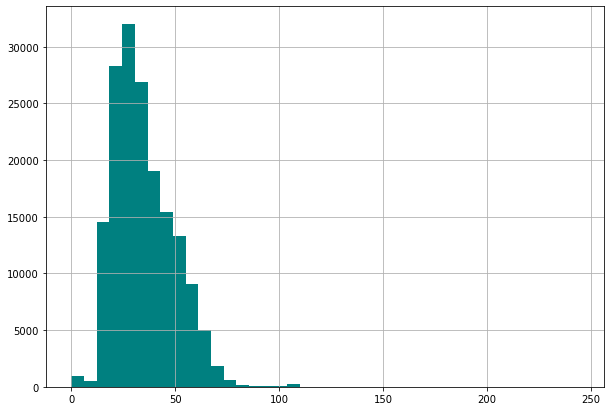

In [26]:
plt.figure(figsize=(10, 7))
users.age.hist(bins=40, color='teal')
#Age column has some invalid entries like nan, 0 and very high values like 100 and above

In [27]:
#In my view values below 5 and above 90 do not make much sense for our book rating case...hence replacing these by NaNs
users.loc[(users.age > 90) | (users.age < 5), 'age'] = np.nan

#replacing NaNs with mean
users.age = users.age.fillna(users.age.mean())

#setting the data type as int
users.age = users.age.astype(np.int32)

<AxesSubplot:xlabel='age'>

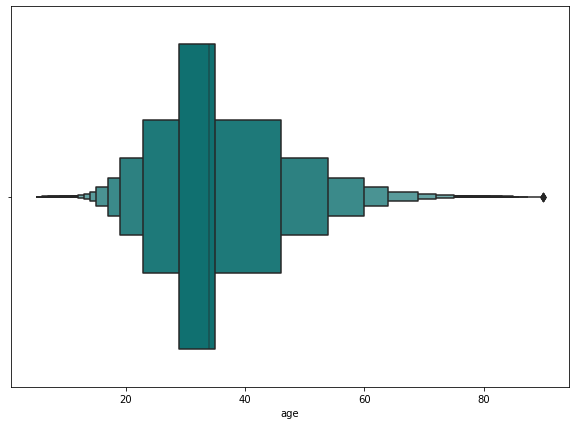

In [30]:
plt.figure(figsize=(10, 7))
sns.boxenplot(users.age, color='teal')

### _location_

In [ ]:
#separate column to get country and city

# 5  . Save data

In [32]:
## Saving the new clean data set under 'books_final' as a new csv file.
users.to_csv(r'C:\Users\ASUS\Data Analytics\Projects\Recommended-Reading\users_final.csv')